[0 2]
aft imstuck
[[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1. 10. 10. 10. 10. 10. 10.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]]
#######################nextile##############################
now
[0 2]
horizontal
0
map_now
[ 1.  0.  0.  0.  1.  1. 10.  1.]
i am at
0
now_row - owns
[ 0. -1. -2. -3. -4. -5. -6. -7.]
map checker before considering path
[   0.   -0.   -0.   -0. -100. -100. -100. -100.]
map_checker after considering path
[   0.   -0.   -0.   -0. -100. -100. -100. -100.]
map_now
[1.    0.    0.    0.    1.    1.    0.001 1.   ]
rockend
[0 7]
nextile_row
6
nextile_row + 1
7
now
[6, 2]
now_column
2
map_checker
[   1.   -0.   -0.   -0. -100. -100. -100. -100.]
aft nextile
[[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.     0.     0.     0.     0.     0.     1.   ]
 [ 1.     0.     0.     0

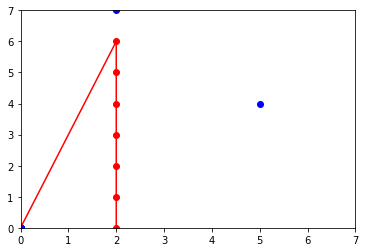

[[0 2]
 [0 3]]
[[3 7]
 [4 7]]


In [5]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import ice_cave_library as ice
from random import *

from numpy.core.records import array
from numpy.lib.stride_tricks import _broadcast_to_dispatcher
#import pygame as pg


######################################################################
########################### Set-ups ##################################


width = 6
length = 6

startpoint = np.array([[0, 2], [0, 3]]) # same as (1, 3), (1, 4)
endpoint = np.array([[3, 7], [4, 7]]) # same as (4, 8), (5, 8)

initial_rocks = np.array([[4, 5]]) # same as (5, 6)
odds_of_rocks = 0.1 # 10% odds of rocks


#######################################################################
#######################################################################


## randomly set startpoint
startpoint_save = startpoint
startpoint = startpoint[randint(1, startpoint.shape[0]) - 1]

## check if the start / end move is vertical / horizontal
if startpoint[0] == 0 or startpoint[0] == width + 1:
    vertical_s = 1
    horizontal_s = 0    
else:
    vertical_s = 0
    horizontal_s = 1
    
if endpoint[0][0] == 0 or endpoint[0][0] == length + 1:
    vertical_e = 1
    horizontal_e = 0    
else:
    vertical_e = 0
    horizontal_e = 1


#######################################################################
#######################################################################
### restart point ###

problemo = 1 
while problemo == 1:

    problemo = 0

    # Plot setups
    maps = np.zeros((length + 2, width + 2))

    ## set rocks
    maps[:, 0] = 1
    maps[:, width + 1] = 1
    maps[length + 1, :] = 1
    maps[0, :] = 1

    ## set initial setups
    keep = 1

    row = startpoint[0]
    column = startpoint[1]

    horizontal = horizontal_s
    vertical = vertical_s

    now = startpoint

    ### path set
    path = np.zeros([(length + 2) * (width + 2), 2])
    num_path = 0

    ### rock set
    rocks = np.zeros([(length + 2) * (width + 2), 2])
    num_rocks = 0
    for i in range(0, initial_rocks.shape[0]):
        maps[initial_rocks[i]] = 1
        rocks[i] = initial_rocks[i]
        num_rocks = num_rocks + 1

    #######################################################################
    #######################################################################

    joints = 0
#     maps[startpoint[0, :]] = 0.001
    print(startpoint)
    
    
    while keep == 1:
        
        #find stuckpoint
        maps = ice.imstuck(maps)
        
        print('aft imstuck')
        with np.printoptions(precision=3, suppress=True):
            print(maps)
            
        #update now_latest
        now_latest = now
        
        #decide next tile
        now, maps, horizontal, rock_now, problemo = ice.nextile(now, maps, horizontal)
        
        print('aft nextile')
        with np.printoptions(precision=3, suppress=True):
            print(maps)
            
        
        
        #update maps, path, rocks
        maps, path, rocks, num_path, num_rocks = ice.writemap(maps, now, path, rocks, rock_now, num_path, num_rocks, horizontal, now_latest)

        
        print('aft writemap')
        with np.printoptions(precision=3, suppress=True):
            print(maps)
            
        #swap
        horizontal, vertical = vertical, horizontal
        
#         if joints > 4:
#             #check if the path can end
#             keep, maps, path, num_path = ice.endcheck(keep, maps, path, num_path, now, endpoint, horizontal, horizontal_e)
        
        joints = joints + 1
        if joints > 0:
            keep = 0
    
#######################################################################
#######################################################################
# plot


print(num_path)
print(path)
print(rocks)
print(now)

 
with np.printoptions(precision=3, suppress=True):
    print(maps)
    
plt.plot(path[:, 1], path[:, 0], 'ro-')
# plt.plot(startpoint_save[0, :], startpoint_save[:, 1] 'r*')
# plt.plot(endpoint[:, 0], endpoint[:, 1] 'r*')
plt.axis([0, length + 1, 0, width + 1])

plt.plot(rocks[:, 1], rocks[:, 0], 'bo')
plt.show()
print(startpoint_save)
print(endpoint)

In [8]:
maps = ice.imstuck(maps)

print('aft imstuck')
with np.printoptions(precision=3, suppress=True):
    print(maps)

#update now_latest
now_latest = now

#decide next tile
now, maps, horizontal, rock_now, problemo = ice.nextile(now, maps, horizontal)

print('aft nextile')
with np.printoptions(precision=3, suppress=True):
    print(maps)



#update maps, path, rocks
maps, path, rocks, num_path, num_rocks = ice.writemap(maps, now, path, rocks, rock_now, num_path, num_rocks, horizontal, now_latest)


print('aft writemap')
with np.printoptions(precision=3, suppress=True):
    print(maps)

#swap
horizontal, vertical = vertical, horizontal

#         if joints > 4:
#             #check if the path can end
#             keep, maps, path, num_path = ice.endcheck(keep, maps, path, num_path, now, endpoint, horizontal, horizontal_e)


    
    
#######################################################################
#######################################################################
# plot


print(num_path)
print(path)
# print(rocks)
print(now)

 
with np.printoptions(precision=3, suppress=True):
    print(maps)
    
plt.plot(path[:, 1], path[:, 0], 'ro-')
# plt.plot(startpoint_save[0, :], startpoint_save[:, 1] 'r*')
# plt.plot(endpoint[:, 0], endpoint[:, 1] 'r*')
plt.axis([0, length + 1, 0, width + 1])

plt.plot(rocks[:, 1], rocks[:, 0], 'bo')
plt.show()
print(startpoint_save)
print(endpoint)

aft imstuck
[[ 1.     1.     0.001  1.     1.     1.     1.     1.   ]
 [ 1.     0.     0.001  0.     0.     0.     0.     1.   ]
 [ 1.     0.     0.001  0.     0.     0.     0.     1.   ]
 [ 1.     0.     0.001  0.     0.     0.     0.     1.   ]
 [ 1.     1.    10.     1.     1.     1.     1.     1.   ]
 [ 1.     1.    10.     1.     1.     1.     1.     1.   ]
 [ 1.    10.     0.001 10.    10.    10.    10.     1.   ]
 [ 1.     1.     1.     1.     1.     1.     1.     1.   ]]
#######################nextile##############################
now
[6, 2]
horizontal
1
map_now
[ 1.    10.     0.001 10.    10.    10.    10.     1.   ]
i am at
2
now_column - owns
[ 2.  1.  0. -1. -2. -3. -4. -5.]
map checker before considering path
[ 100.  100.    0. -100. -100. -100. -100. -100.]
map_checker after considering path
[ 100.  100.    0. -100. -100. -100. -100. -100.]
aft nextile
[[ 1.     1.     0.001  1.     1.     1.     1.     1.   ]
 [ 1.     0.     0.001  0.     0.     0.     0.     1.   ]
 

UnboundLocalError: local variable 'path_add' referenced before assignment

In [ ]:
a = 0
b = 10
for i in range(a, b, 1):
    print(i)
    
for i in range(b - 1, a - 1, -1):
    print(i)

In [ ]:


for i in range(0, map_checker.shape[0]):  
    if map_checker[i] < 10:
        if map_checker[i] > -10:
            #map_checker[i] = 0
            if (map_checker[i] > 0 and map_checker[i] < 1):
                if i < map_checker.shape[0]:
                    map_checker[i + 1] = 1

            elif (map_checker[i] < 0 and map_checker[i] > -1):
                if i > 0:
                    map_checker[i - 1] = 1
                    
                    
for i in range(now_column - 1, -1, - 1):
    if map_checker[i] > 0 and map_checker[i] < 1:
        map_checker[i + 1] = 1

for i in range(now_column, map_checker.shape[0], 1):
    if map_checker[i] < 0 and map_checker[i] > -1:
        map_checker[i - 1] = 1

In [ ]:
import numpy as np

map_checker = np.array([100, 0.001, 0.001, 0.001, -0.001, -0.001, -0.001, -100])
now_row = 3

for i in range(now_row - 1, -1, - 1):
    if map_checker[i] > 0 and map_checker[i] < 1:
        map_checker[i + 1] = 1

for i in range(now_row, map_checker.shape[0], 1):
    if map_checker[i] < 0 and map_checker[i] > -1:
        map_checker[i - 1] = 1
    
with np.printoptions(precision=3, suppress=True):
    print(map_checker)

In [ ]:
import numpy as np
now_row = 2
checker = np.array([100, 0, 0, 100, 0, -100, 0, -100])

for i in range(checker.shape[0]):
    if checker[i] > 99:
        leftend = i
    if checker[i] > -99:
        rightend = i + 1
        

endend = np.array([leftend, rightend])
print(endend)
# if now_row, leftend == endpoint or now_row, rightend == endpoint  -> end
